<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="45%" align="right" border="4">

# Interactive IPython Notebooks

Yves Hilpisch

<a href='mailto:yves@pythonquants.com'>yves@pythonquants.com</a>

<a href='http://pythonquants.com'>www.pythonquants.com</a>

The Python Quants GmbH

In [1]:
from IPython.html.widgets import *

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

In [3]:
class call_option(object):
    from math import log, sqrt, exp
    from scipy import stats
    global log, sqrt, exp, stats
    
    def __init__(self, S0, K, T, r, sigma):
        self.S0 = float(S0)
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
    
    def value(self):
        ''' Return option value. '''
        d1 = ((log(self.S0 / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T)
                / (self.sigma * sqrt(self.T)))
        d2 = ((log(self.S0 / self.K) + (self.r - 0.5 * self.sigma ** 2) * self.T)
                / (self.sigma * sqrt(self.T)))
        value = (self.S0 * stats.norm.cdf(d1, 0.0, 1.0)
                - self.K * exp(-self.r * self.T) * stats.norm.cdf(d2, 0.0, 1.0))
        return value
    
    def vega(self):
        ''' Return Vega of option. '''
        d1 = ((log(self.S0 / self.K)
            + (self.r + (0.5 * self.sigma ** 2)) * self.T)
            / (self.sigma * sqrt(self.T)))
        vega = self.S0 * stats.norm.cdf(d1, 0.0, 1.0) * sqrt(self.T)
        return vega

### Print Output

In [4]:
def vega_calculation(S0=100, T=1.0, r=0.01, sigma=0.2, n=10):
    np.set_printoptions(formatter={'all' : 
                        lambda x: '%6.2f' % x})
    o = call_option(S0, 100, T, r, sigma)
    strikes = np.linspace(80, 120, n)
    vegas = []
    for k in strikes:
        o.K = k
        vegas.append(o.vega())
    print "Strike:", strikes.round(3)
    print "Vega:  ", np.array(vegas).round(3)

In [5]:
interact(vega_calculation, S0=(75, 125, 1),
                       T=(0.01, 2.0, 0.01),
                       r=(0.0, 0.1, 0.005),
                       sigma=(0.01, 0.5, 0.01),
                       n=(1, 20, 1))

Strike: [ 80.00  84.44  88.89  93.33  97.78 102.22 106.67 111.11 115.56 120.00]
Vega:   [ 89.72  84.02  77.00  68.97  60.35  51.60  43.15  35.32  28.34  22.32]


<function __main__.vega_calculation>

### 2d Plot

In [6]:
def vega_plot_2d(S0=100, T=1.0, r=0.01, sigma=0.2):
    o = call_option(S0, 100, T, r, sigma)
    strikes = np.linspace(80, 120, 20)
    vegas = []
    for k in strikes:
        o.K = k
        vegas.append(o.vega())
    plt.figure(figsize=(8, 5))
    plt.plot(strikes, vegas)
    plt.grid(True)
    plt.xlabel('strike')
    plt.ylabel('Vega')

<function __main__.vega_plot_2d>

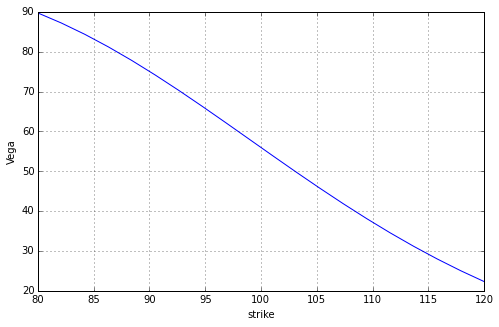

In [7]:
interact(vega_plot_2d, S0=(75, 125, 1),
                       T=(0.01, 2.0, 0.01),
                       r=(0.0, 0.1, 0.005),
                       sigma=(0.01, 0.5, 0.01))

### 3d Plot

In [8]:
def vega_plot_3d(S0=100, r=0.01, sigma=0.2):
    o = call_option(S0, 100, 1.0, r, sigma)
    maturities = np.linspace(0.05, 2.0, 20)
    strikes = np.linspace(80, 120, 20)
    T, K = np.meshgrid(strikes, maturities)
    V = np.zeros_like(K)
    for t in enumerate(maturities):
         for k in enumerate(strikes):
             o.T = t[1]
             o.K = k[1]
             V[t[0], k[0]] = o.vega()
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(T, K, V, rstride=1, cstride=1,
             cmap='RdYlBu_r', linewidth=0.5, antialiased=True)
    ax.set_xlabel('strike')
    ax.set_ylabel('maturity')
    ax.set_zlabel('Vega of European call option')
    fig.colorbar(surf, shrink=0.5, aspect=5)

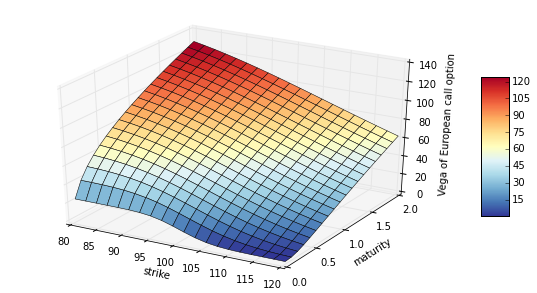

In [9]:
interact(vega_plot_3d, S0=(75, 125, 1),
                    r=(0.0, 0.1, 0.005),
                    sigma=(0.01, 0.5, 0.01))